In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load and save the data into variable
df = pd.read_csv('heart.csv')

In [3]:
# Print the data
df.head()

,age,sex,trestbps,restecg,thalach,temp,target
0,52,1,125,1,168,98.4,0
1,53,1,140,0,155,97.7,0
2,70,1,145,1,125,94.2,0
3,61,1,148,1,161,97.1,0
4,62,0,138,1,106,97.4,0


In [4]:
# Get data types
df.dtypes

age           int64
sex           int64
trestbps      int64
restecg       int64
thalach       int64
temp        float64
target        int64
dtype: object

In [5]:
# Get the shape of the data
df.shape

(1025, 7)

In [6]:
# Count the empty values in each column
df.isna().sum()

age         0
sex         0
trestbps    0
restecg     0
thalach     0
temp        0
target      0
dtype: int64

In [7]:
# View basic statistics
df.describe()

,age,sex,trestbps,restecg,thalach,temp,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,131.611707,0.529756,149.114146,95.376780,0.513171
std,9.072290,0.460373,17.516718,0.527878,23.005724,2.889347,0.500070
min,29.000000,0.000000,94.000000,0.000000,71.000000,89.000000,0.000000
25%,48.000000,0.000000,120.000000,0.000000,132.000000,92.800000,0.000000
50%,56.000000,1.000000,130.000000,1.000000,152.000000,96.400000,1.000000
75%,61.000000,1.000000,140.000000,1.000000,166.000000,97.900000,1.000000
max,77.000000,1.000000,200.000000,2.000000,202.000000,100.400000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

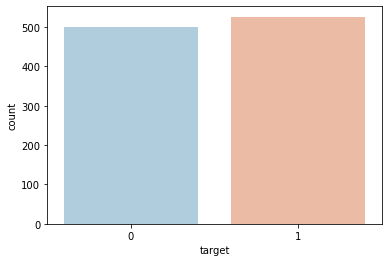

In [8]:
# Visualize the count of the number of patients with a heart disease and without.
sns.countplot(x='target', data=df, palette='RdBu_r')

In [9]:
# Get the correlation of the columns in data set.
df.corr()

,age,sex,trestbps,restecg,thalach,temp,target
age,1.000000,-0.103240,0.271121,-0.132696,-0.390227,0.180270,-0.229324
sex,-0.103240,1.000000,-0.078974,-0.055117,-0.049365,0.325934,-0.279501
trestbps,0.271121,-0.078974,1.000000,-0.123794,-0.039264,0.109902,-0.138772
restecg,-0.132696,-0.055117,-0.123794,1.000000,0.048411,-0.107689,0.134468
thalach,-0.390227,-0.049365,-0.039264,0.048411,1.000000,-0.288572,0.422895
temp,0.180270,0.325934,0.109902,-0.107689,-0.288572,1.000000,-0.806653
target,-0.229324,-0.279501,-0.138772,0.134468,0.422895,-0.806653,1.000000


<AxesSubplot:>

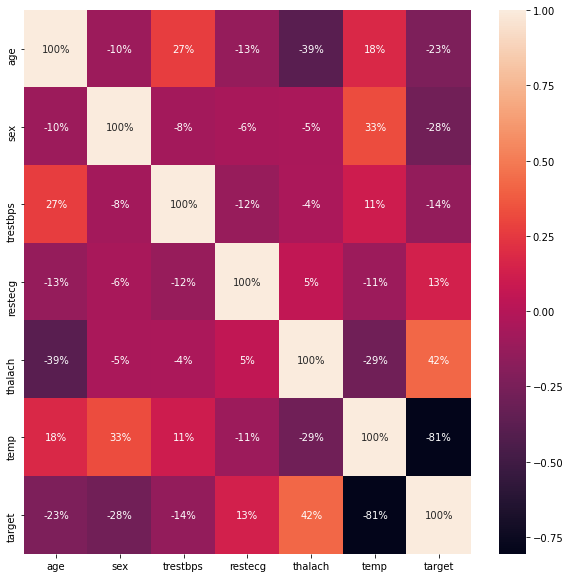

In [10]:
import matplotlib.pyplot as plt
# Get correlations of each features in dataset
correlationsmat = df.corr()
top_correlations_features = correlationsmat.index
plt.figure(figsize=(10,10))

# Visualize the data
sns.heatmap(df[top_correlations_features].corr(), annot=True, fmt='.0%')

In [11]:
# Spit into feature data and target data.
X = df.loc[:, df.columns != 'target']
Y = df['target']

In [12]:
# Split into 80% training and 20% testing data set.
from sklearn.model_selection import train_test_split
X_train_data_set, X_test_data_set, Y_train_data_set, Y_test_data_set = train_test_split(X, Y, test_size= 0.20, random_state = 0)

In [13]:
# Use RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
randomForestClassifier.fit(X_train_data_set, Y_train_data_set)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [14]:
from sklearn.metrics import accuracy_score

# Test the models accuracy on the data set.
random_forest_model = randomForestClassifier

Y_pred_rf = random_forest_model.predict(X_test_data_set)
score_dt = round(accuracy_score(Y_pred_rf,Y_test_data_set) * 100 , 2)

# Print Model test Accuracy
print("Model Test Accuracy: " + str(score_dt)+" %")

Model Test Accuracy: 93.66 %


In [15]:
import joblib
# Save model in output directory
joblib.dump(random_forest_model,'./output/randomforest_model.joblib')

['./output/randomforest_model.joblib']